<a href="https://colab.research.google.com/github/Angelpperez/Estudio_bibl_TACA/blob/main/TACA_estudio_bibl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Bibliométrico, Estado del Arte
##Autor: Angel Pérez

- Ecución de Búsqueda WoS(Web of Science):


In [21]:
!pip install wos

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 8.1 MB/s eta 0:00:00
  Created wheel for wos: filename=wos-0.2.7-py3-none-any.whl size=9902 sha256=ffe89a2895b09ee1f4f8f1992b709c81b0eb96eda834997217bb8a272a2f1fa7
  Stored in directory: /root/.cache/pip/wheels/56/6b/17/ac5407f4aea39f91fbb275c06fa13a32b379c521de96e4453c
  Created wheel for limit: filename=limit-0.2.3-py3-none-any.whl size=2328 sha256=0f2886af449d68de475bdded22344d584257059864b1940aedcbfaa4aab020ac
  Stored in directory: /root/.cache/pip/wheels/6b/01/9b/58628f51846abc09a50dea499334247af58a117cb6882d24dd
Successfully built wos limit


In [22]:
%cd /content/

/content


In [23]:
!git clone https://github.com/Angelpperez/Estudio_bibl_TACA.git
%cd /content/Estudio_bibl_TACA

Cloning into 'Estudio_bibl_TACA'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 162.27 KiB | 6.76 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Estudio_bibl_TACA


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('savedrecs1.xls', engine='xlrd')

In [25]:
# Guarda el archivo en formato .csv
df.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')
#print(data.head())

In [26]:
# Limpieza de datos
data.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Frecuencia de Publicaciones por Año')

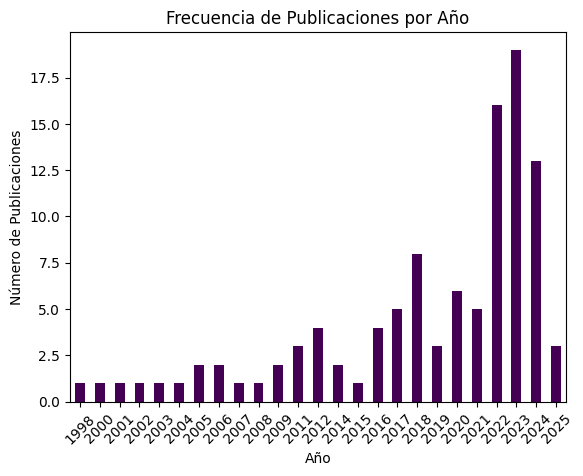

In [27]:
# Análisis de frecuencia de publicaciones por año
publicaciones_por_anio = data.groupby('Publication Year').size()

publicaciones_por_anio.plot(kind='bar', colormap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de Publicaciones')
plt.title('Frecuencia de Publicaciones por Año')

<ipython-input-28-41c981860ad4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=autores_mas_citados.values, y=autores_mas_citados.index, palette='viridis')


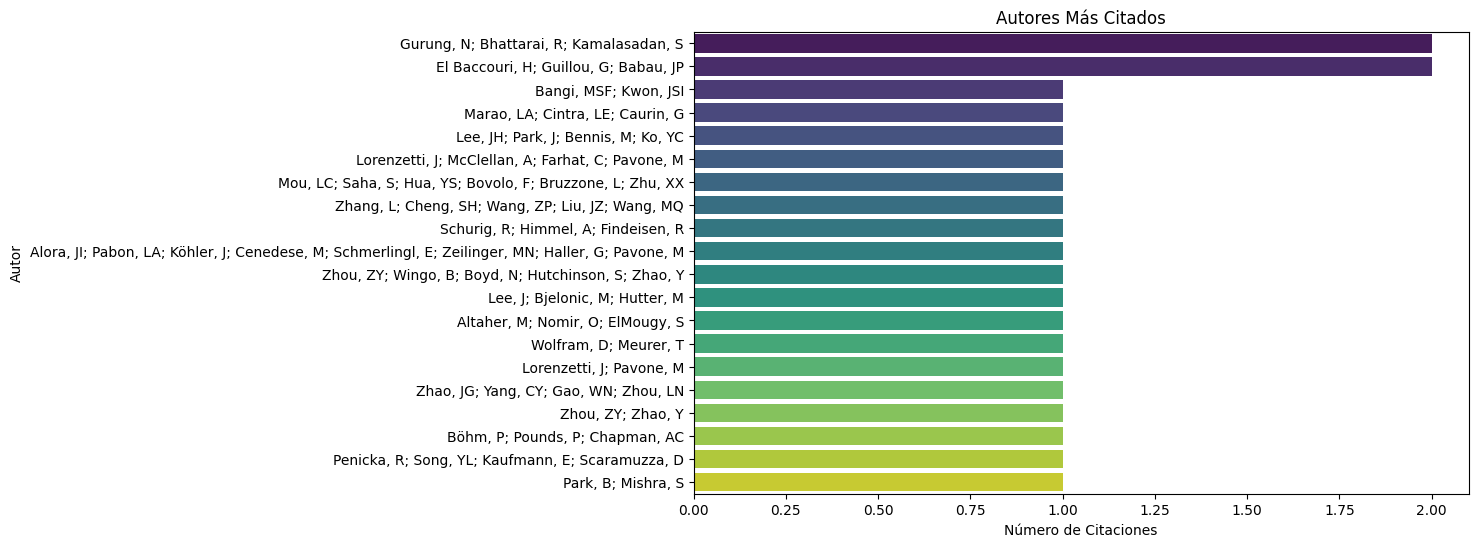

In [28]:
# Análisis de los autores más citados
autores_mas_citados = df['Authors'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=autores_mas_citados.values, y=autores_mas_citados.index, palette='viridis')
plt.title('Autores Más Citados')
plt.xlabel('Número de Citaciones')
plt.ylabel('Autor')
plt.show()

Author
Schuster, E       4
Xu, X             3
Ou, YS            3
Cordier, L        3
Pavone, M         3
Yao, W            2
Lorenzetti, J     2
Kamalasadan, S    2
Bhattarai, R      2
Wu, QH            2
Wen, JY           2
Jiang, L          2
Cheng, SJ         2
El Baccouri, H    2
Guillou, G        2
Babau, JP         2
Gurung, N         2
Huang, ZH         2
Findeisen, R      2
Bergmann, M       2
Name: count, dtype: int64


<ipython-input-29-eb9dc84950ae>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')


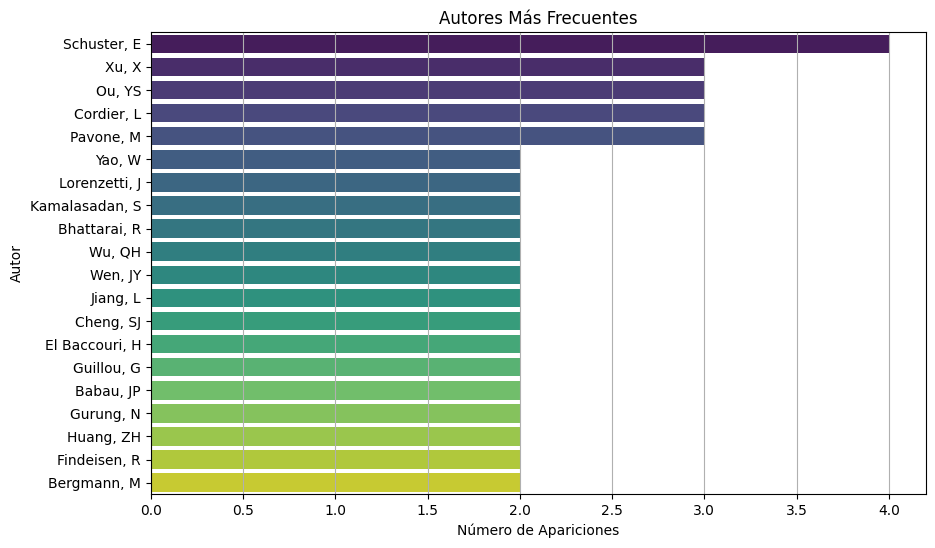

In [29]:
# Separar los nombres de autores en una lista si están en un solo campo
df['Authors'] = df['Authors'].str.split('; ')

# Crear un DataFrame a partir de la lista de autores
authors_df = pd.DataFrame(df['Authors'].tolist()).stack().reset_index(level=1, drop=True).to_frame('Author')

# Calcular los autores más frecuentes
authors_counts = authors_df['Author'].value_counts().head(20)

# Mostrar los autores más frecuentes
print(authors_counts)

# Visualización de los autores más citados
plt.figure(figsize=(10, 6))
sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')
plt.title('Autores Más Frecuentes')
plt.xlabel('Número de Apariciones')
plt.ylabel('Autor')
plt.grid(axis='x')
plt.show()

                                         Article Title  Cited Reference Count
99   GrainNN: A neighbor-aware long short-term memo...                     88
6    A latent space method with maximum entropy dee...                     86
29   Control of wastewater treatment plants using e...                     80
22   Improved off-policy reinforcement learning alg...                     74
2    Deep Reinforcement Learning for Band Selection...                     71
87   Optimal location and geometry of sensors and a...                     68
4    Integrating LEO Satellites and Multi-UAV Reinf...                     60
21   Optimal data-driven control of manufacturing p...                     59
92   Dynamic Analysis and Control for a Bioreactor ...                     56
25   Rapid Construction of Aerocapture Attainabilit...                     53
98   Flow reconstruction from sparse sensors based ...                     52
65   Stochastic Optimal Control for Collective Vari...          

<ipython-input-30-00a333c51404>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publicaciones_mas_citadas['Cited Reference Count'], y=publicaciones_mas_citadas['Article Title'], palette='viridis')


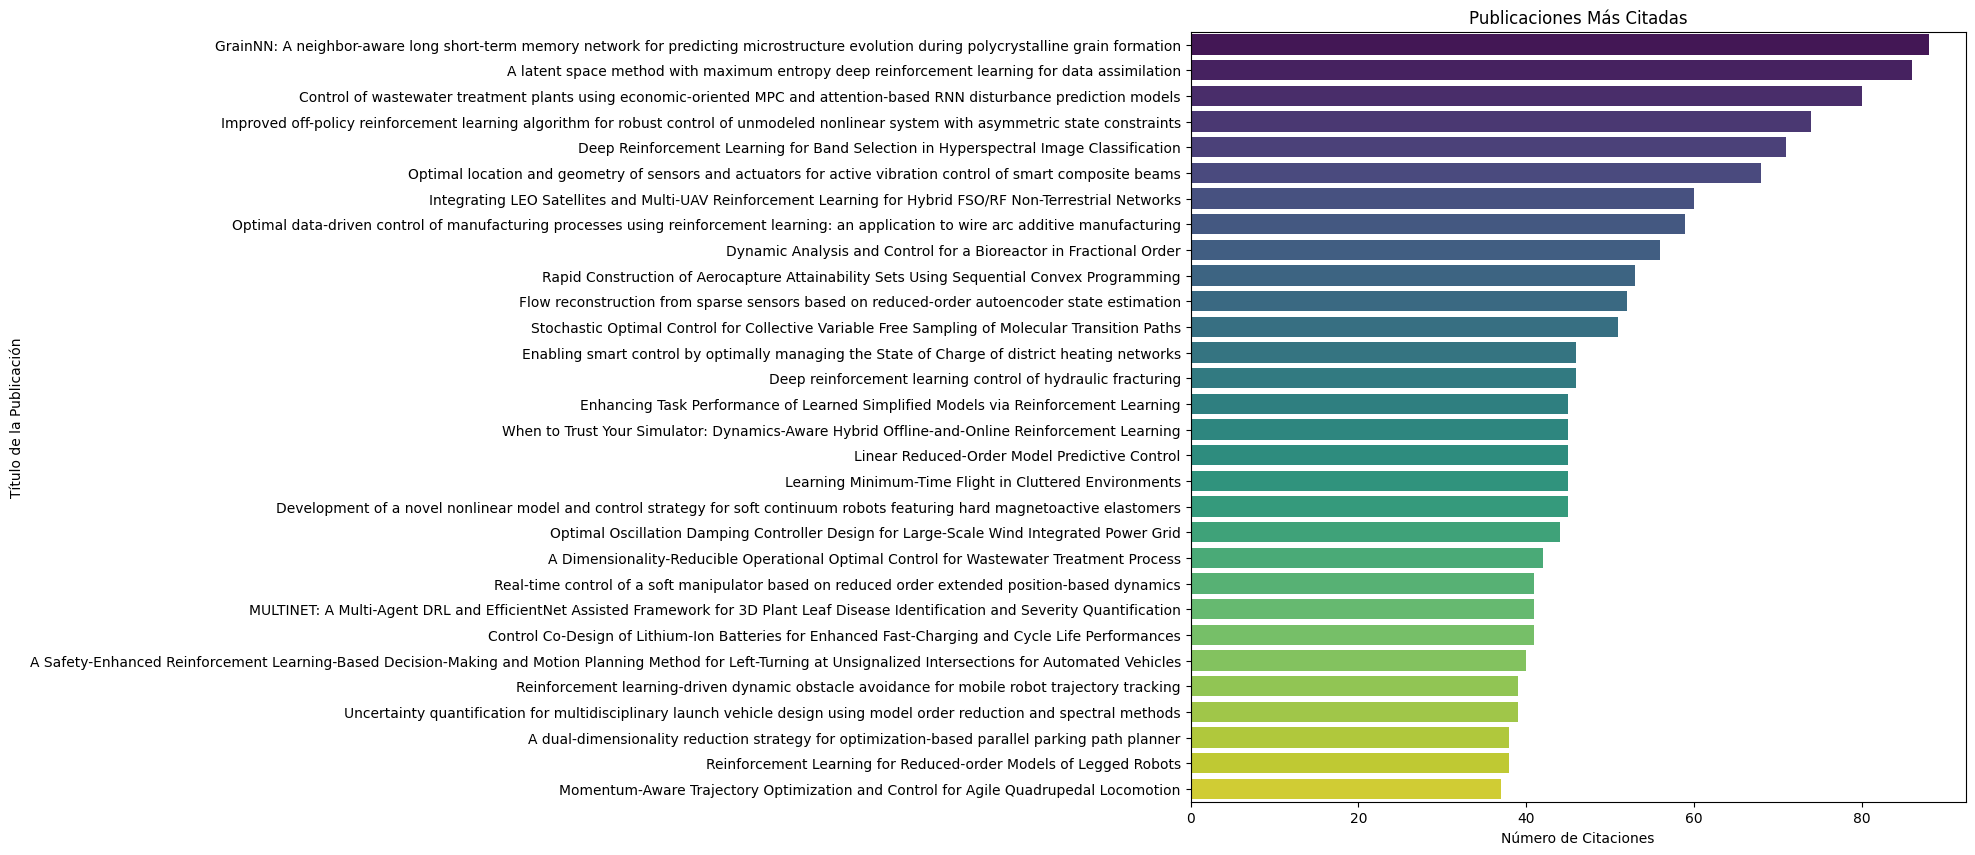

In [30]:
#Obtener publicaciones más citadas de los últimos 5 años
from datetime import datetime
# citas sea de tipo numérico
df['Cited Reference Count'] = pd.to_numeric(df['Cited Reference Count'], errors='coerce')

publicaciones_recientes = df[df['Publication Year'] >= datetime.now().year - 5]

# Obtener las publicaciones más citadas
publicaciones_mas_citadas = publicaciones_recientes.sort_values(by='Cited Reference Count', ascending=False).head(30)

# Mostrar las publicaciones más citadas
print(publicaciones_mas_citadas[['Article Title', 'Cited Reference Count']])

# Visualización de las publicaciones más citadas
plt.figure(figsize=(10, 10))
sns.barplot(x=publicaciones_mas_citadas['Cited Reference Count'], y=publicaciones_mas_citadas['Article Title'], palette='viridis')
plt.title('Publicaciones Más Citadas')
plt.xlabel('Número de Citaciones')
plt.ylabel('Título de la Publicación')
plt.show()

In [31]:
!pip install wordcloud networkx matplotlib

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

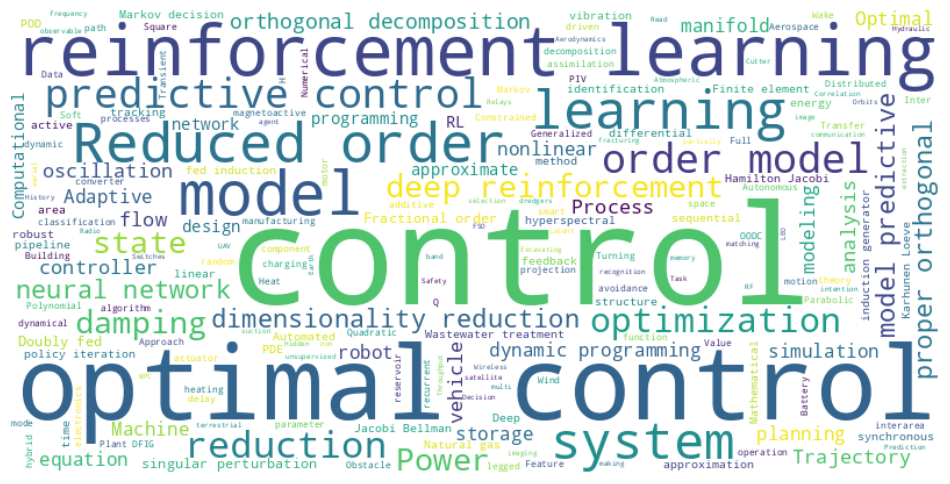

In [32]:
from wordcloud import WordCloud

# Unir todas las palabras clave en un solo string
text = ' '.join(df['Author Keywords'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Text(0.5, 1.0, 'Relaciones entre Palabras Clave')

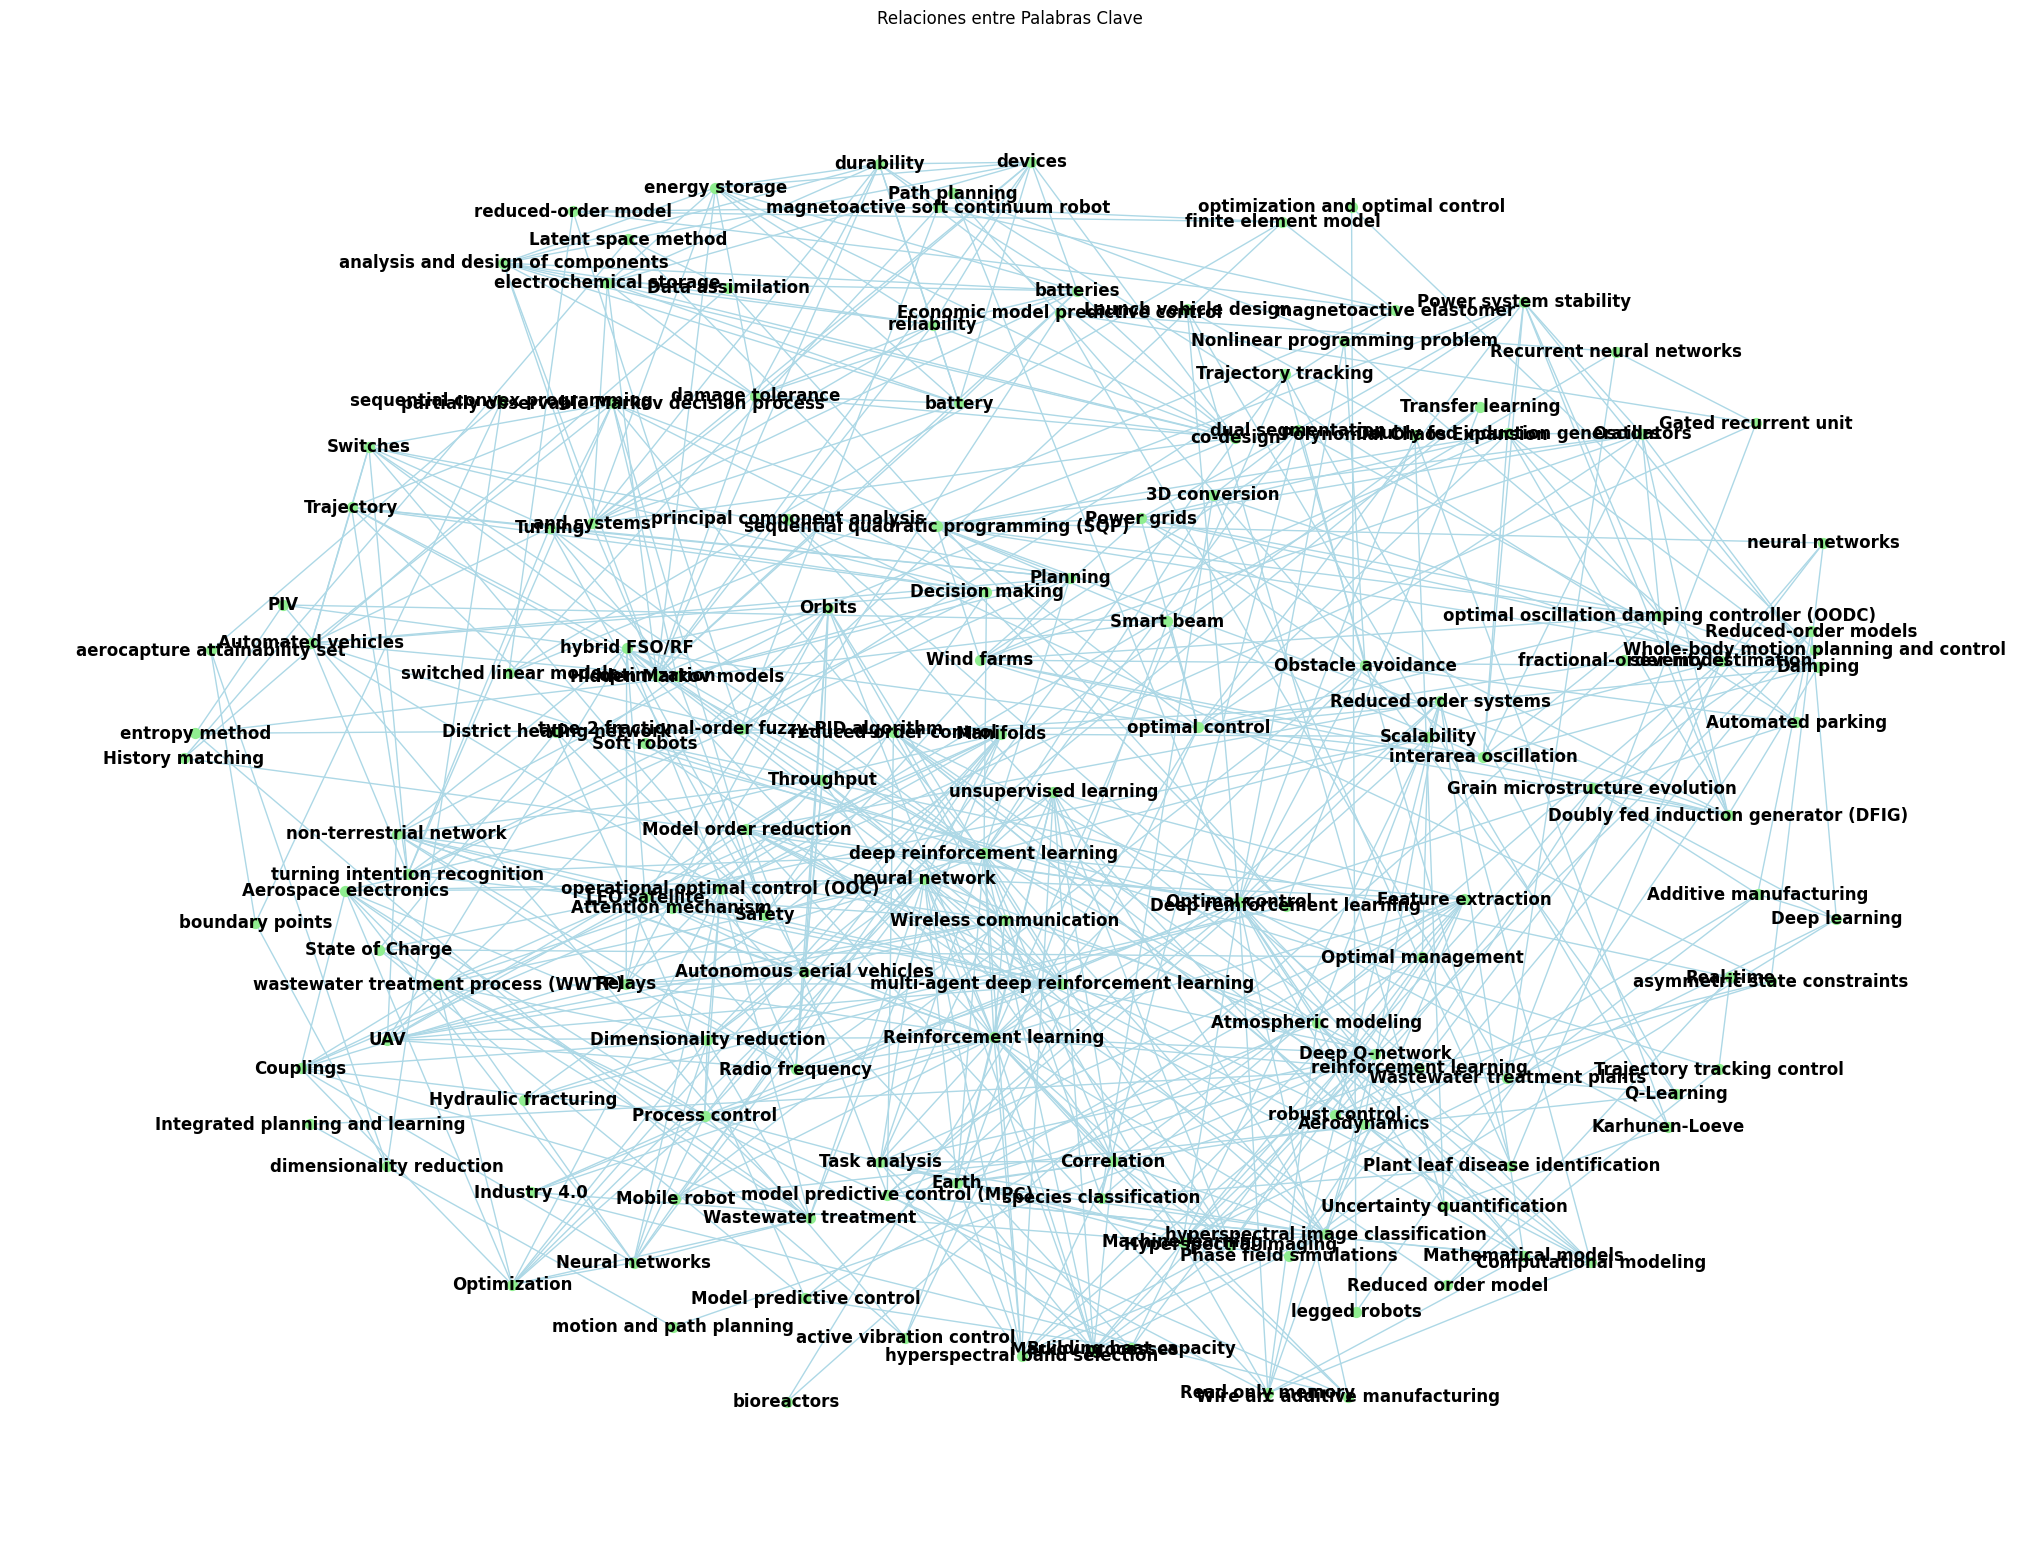

In [33]:
import networkx as nx

G = nx.Graph()

# Añadir nodos y aristas al grafo basados en las relaciones entre palabras clave
for index, row in publicaciones_mas_citadas.iterrows():
    keywords = row['Author Keywords']
    if pd.notna(keywords):
        keywords_list = keywords.split('; ')
        for i, word in enumerate(keywords_list):
            for j in range(i+1, len(keywords_list)):
                G.add_edge(keywords_list[i], keywords_list[j])

# Dibujar el grafo
plt.figure(figsize=(20,15))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=12, node_color="lightgreen", font_color="black", font_weight='bold', edge_color="lightblue")
plt.title('Relaciones entre Palabras Clave')